In [ ]:
!nvidia-smi

Fri Nov 15 01:58:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="bg0lGUu911QUsn27HTSS")
project = rf.workspace("deep-facke-detection").project("deep-fake-detection-xxa8f")
version = project.version(1)
dataset = version.download("folder")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deep-Fake-Detection--1 in folder:: 100%|██████████| 2329/2329 [00:01<00:00, 1446.03it/s]


In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=50 imgsz=128

/content
100% 5.31M/5.31M [00:00<00:00, 77.7MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/Deep-Fake-Detection--1, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [ ]:
!ls -la {HOME}/runs/classify/train/

total 1152
drwxr-xr-x 3 root root   4096 Nov 15 02:10 .
drwxr-xr-x 3 root root   4096 Nov 15 01:59 ..
-rw-r--r-- 1 root root   1583 Nov 15 01:59 args.yaml
-rw-r--r-- 1 root root 100475 Nov 15 02:10 confusion_matrix_normalized.png
-rw-r--r-- 1 root root  90621 Nov 15 02:10 confusion_matrix.png
-rw-r--r-- 1 root root 137802 Nov 15 02:10 events.out.tfevents.1731635976.2642120d4bae.680.0
-rw-r--r-- 1 root root   3682 Nov 15 02:10 results.csv
-rw-r--r-- 1 root root 149013 Nov 15 02:10 results.png
-rw-r--r-- 1 root root  52890 Nov 15 01:59 train_batch0.jpg
-rw-r--r-- 1 root root  52964 Nov 15 01:59 train_batch1.jpg
-rw-r--r-- 1 root root  49931 Nov 15 01:59 train_batch2.jpg
-rw-r--r-- 1 root root  53273 Nov 15 02:08 train_batch4080.jpg
-rw-r--r-- 1 root root  54541 Nov 15 02:08 train_batch4081.jpg
-rw-r--r-- 1 root root  50765 Nov 15 02:08 train_batch4082.jpg
-rw-r--r-- 1 root root  55145 Nov 15 02:10 val_batch0_labels.jpg
-rw-r--r-- 1 root root  55318 Nov 15 02:10 val_batch0_pred.jpg
-rw-r-

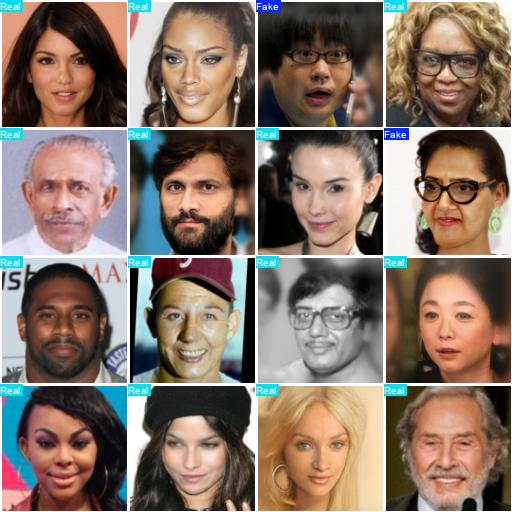

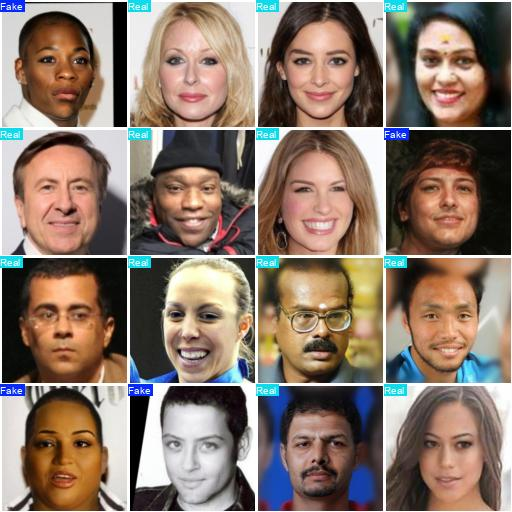

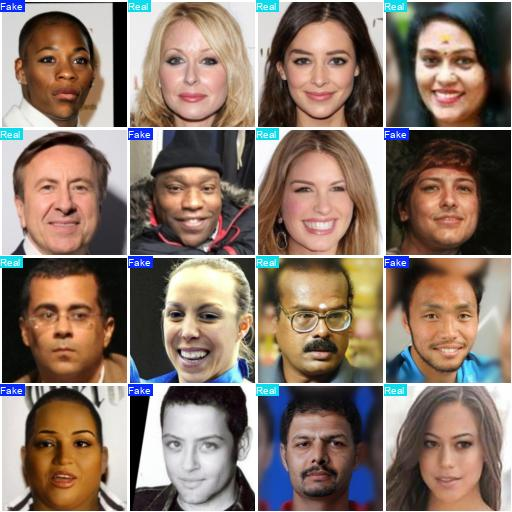

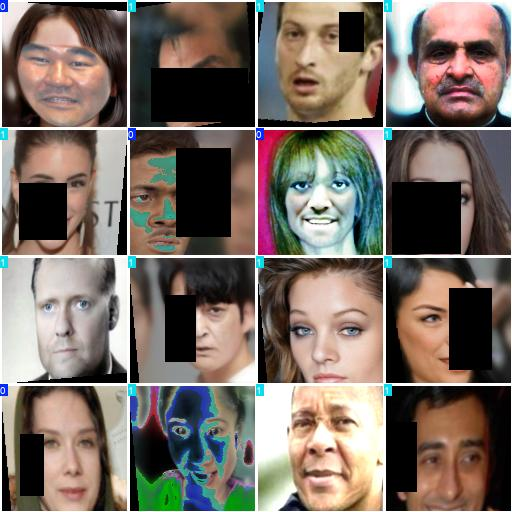

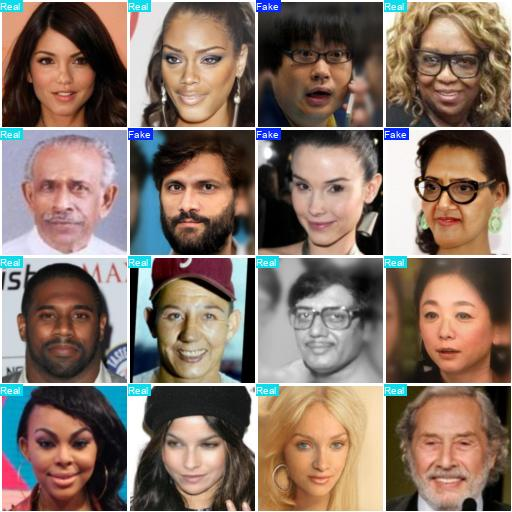

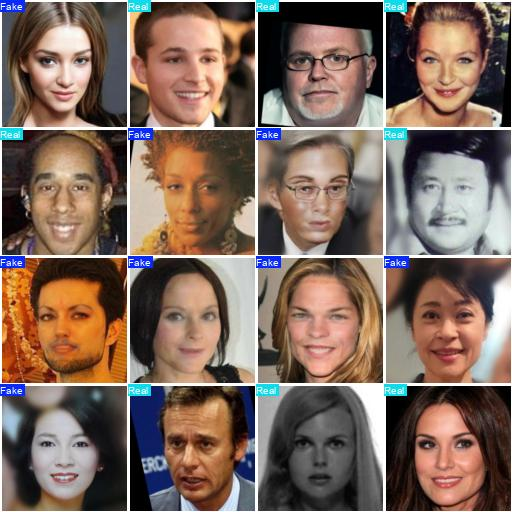

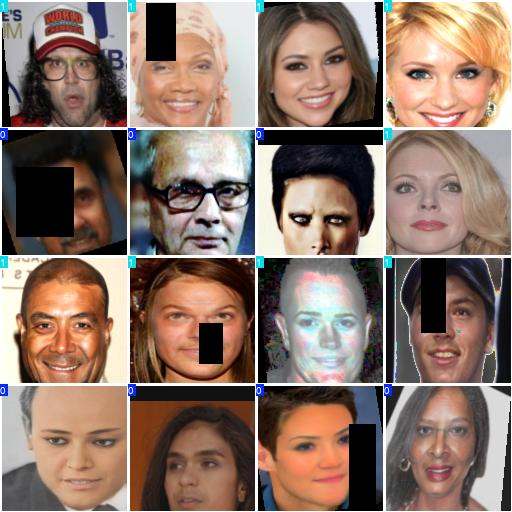

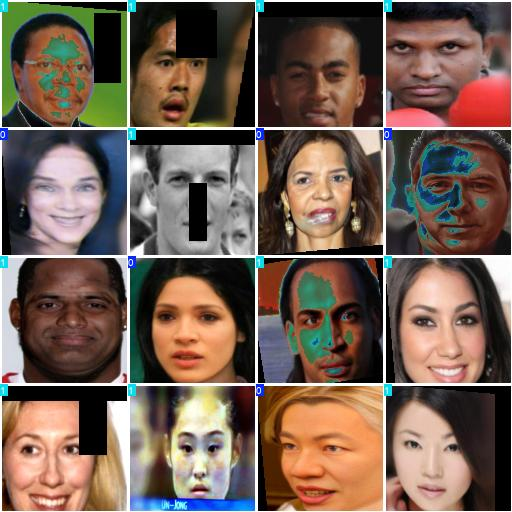

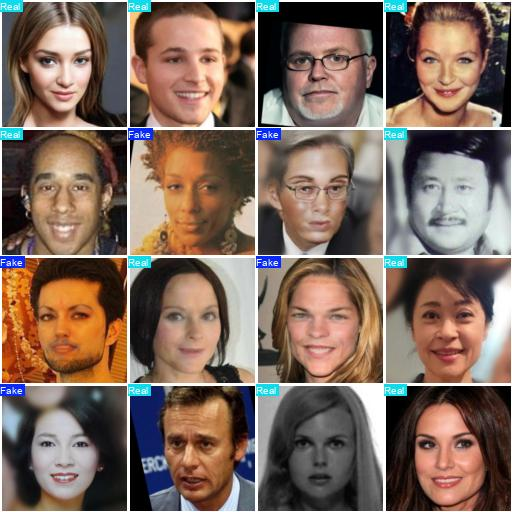

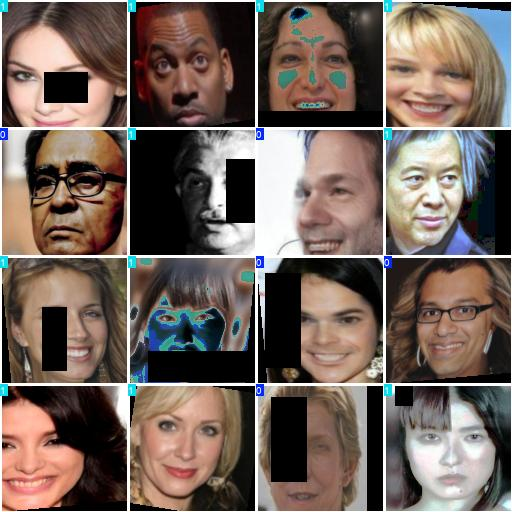

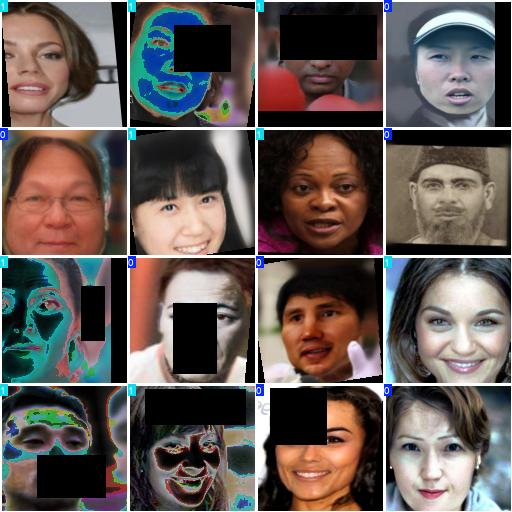

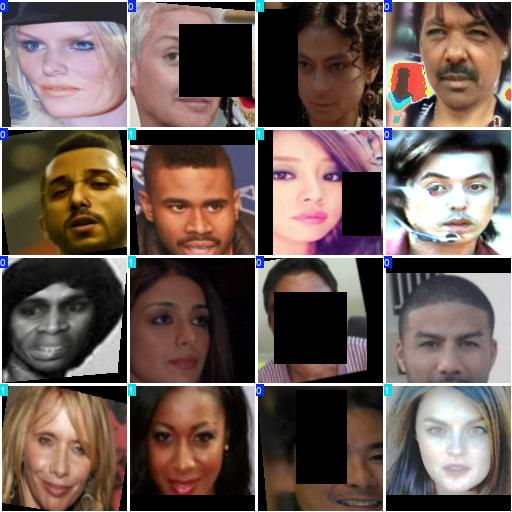

In [ ]:
from IPython.display import Image, display
import os

jpg_files = [file for file in os.listdir('/content/runs/classify/train/') if file.endswith('.jpg')]

for file in jpg_files:
    display(Image(os.path.join('/content/runs/classify/train/', file)))

/content


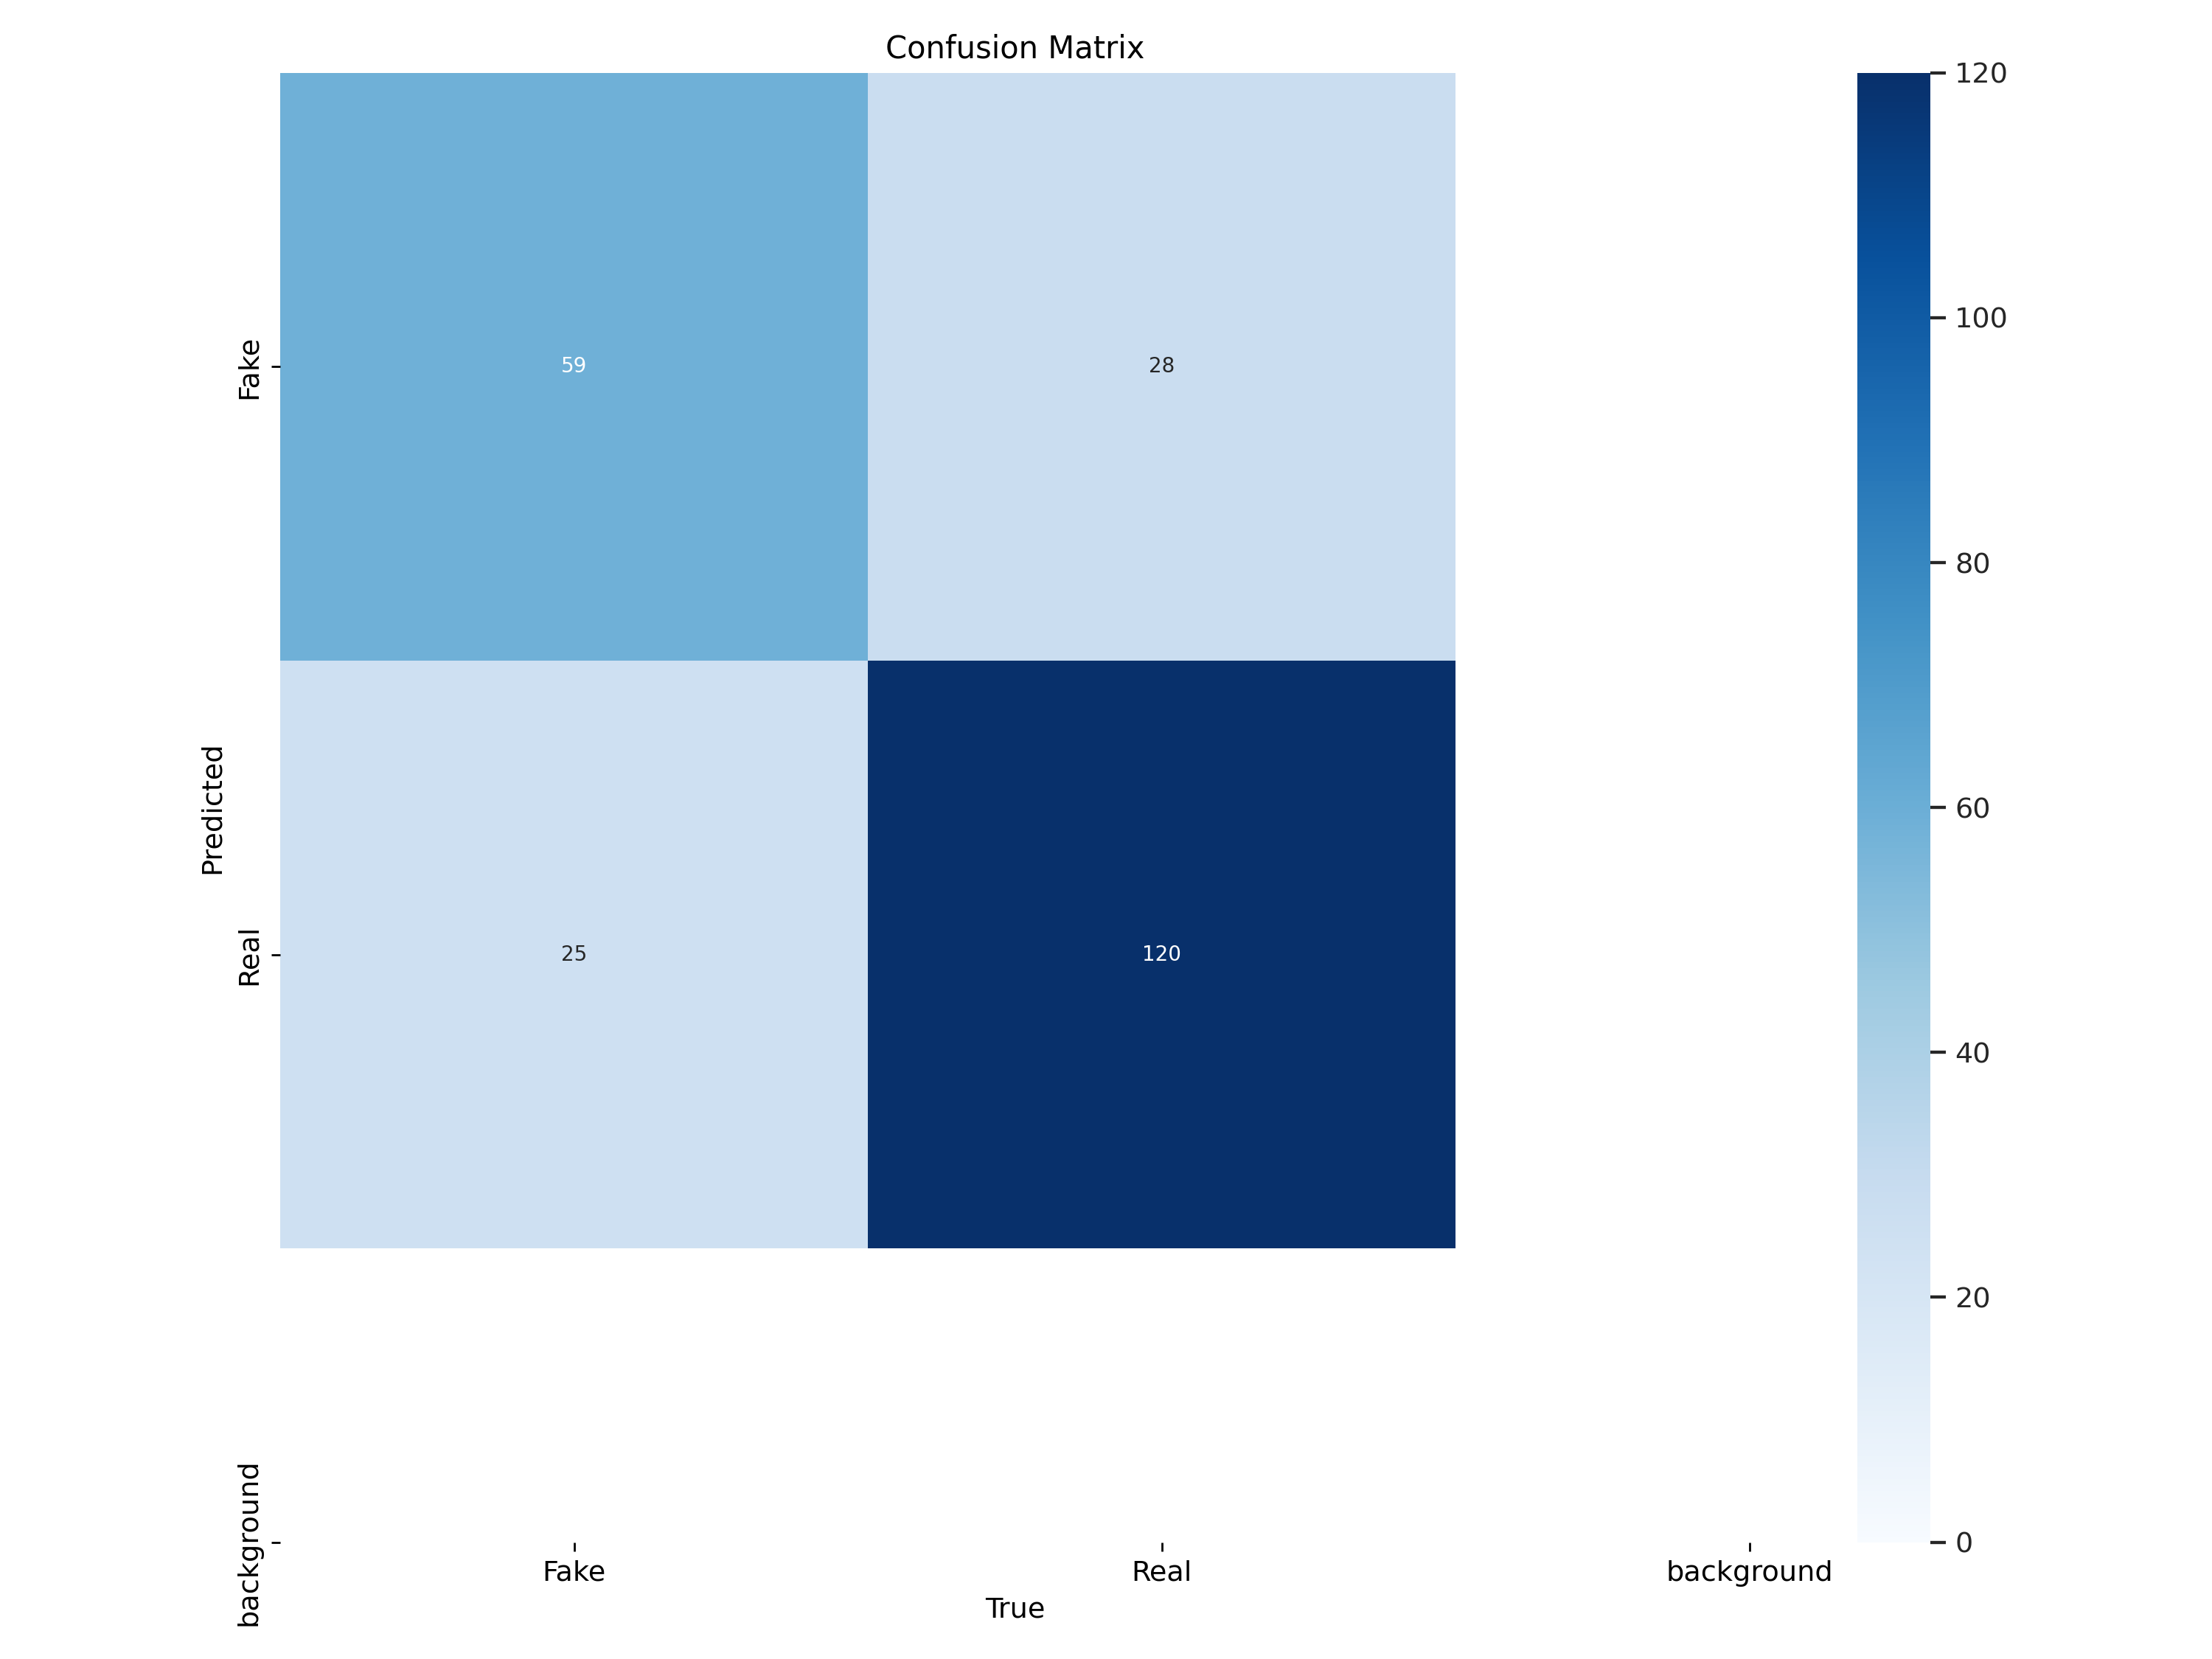

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train/confusion_matrix.png', width=600)

/content


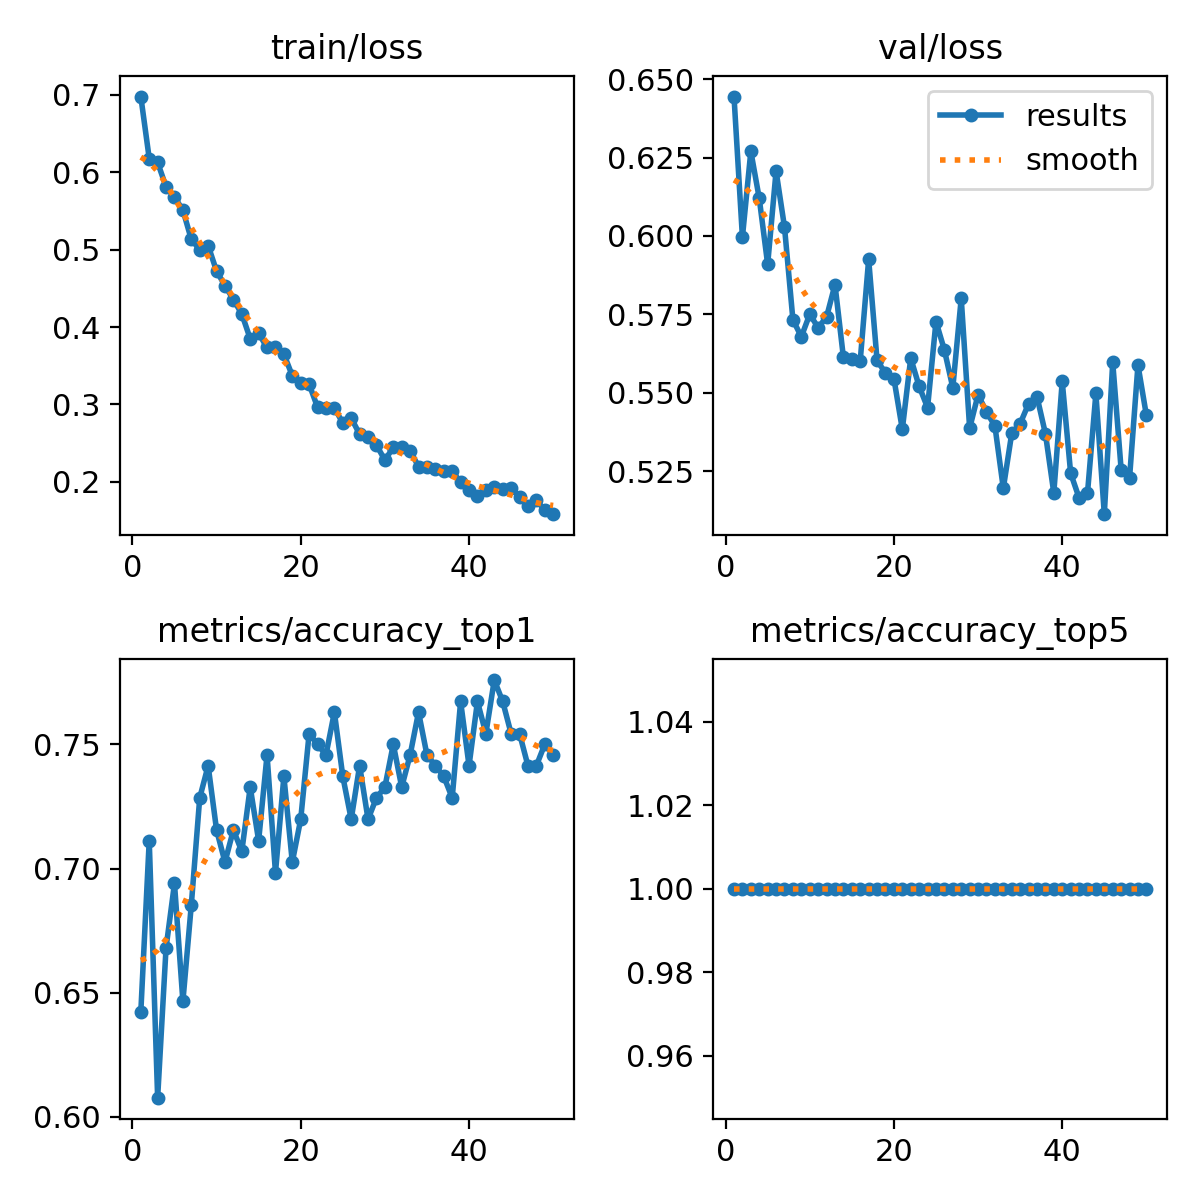

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train/results.png', width=600)

/content


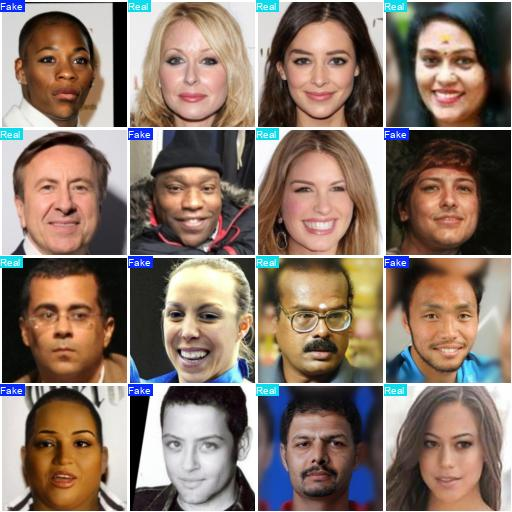

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train/val_batch0_pred.jpg', width=600)

In [ ]:
!cat {HOME}/runs/classify/train/results.csv | head -10

epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
1,15.8964,0.69793,0.64224,1,0.64447,0.000235667,0.000235667,0.000235667
2,30.1004,0.61783,0.71121,1,0.59961,0.000464288,0.000464288,0.000464288
3,42.8444,0.61269,0.60776,1,0.62701,0.000683485,0.000683485,0.000683485
4,53.678,0.58126,0.6681,1,0.612,0.000671588,0.000671588,0.000671588
5,66.9835,0.56817,0.69397,1,0.59094,0.000657451,0.000657451,0.000657451
6,81.5271,0.55112,0.64655,1,0.62067,0.000643314,0.000643314,0.000643314
7,96.4668,0.5133,0.68534,1,0.60284,0.000629177,0.000629177,0.000629177
8,107.06,0.49984,0.72845,1,0.57324,0.00061504,0.00061504,0.00061504
9,125.938,0.50526,0.74138,1,0.56784,0.000600902,0.000600902,0.000600902


In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=25 imgsz=128

/content
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/Deep-Fake-Detection--1, epochs=25, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/classify

/content
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 969, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 554, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 184, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 36, in generator_context
    response = gen.send(None)
  File "/usr/local/

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/content/IMG_20240812_193440680.jpg_1723471804028.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-cls", model_path=f"{HOME}/runs/classify/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.31, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/deep-facke-detection/deep-fake-detection-xxa8f/1/uploadModel?api_key=bg0lGUu911QUsn27HTSS&modelType=yolov8-cls&nocache=true


In [ ]:
# Run inference on your model on a persistant, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random, glob
test_set_loc = dataset.location + "/content/IMG_20240812_193440680.jpg_1723471804028.jpg"
random_test_image = random.choice(glob.glob(f"{dataset.location}/test/**/*.jpg"))
print("running inference on " + random_test_image)

pred = model.predict(random_test_image).json()
pred

running inference on /content/datasets/Deep-Fake-Detection--1/test/Real/deepfake-src_27-ref_41_jpg.rf.3cad8d12e4b7b2f265da0d3f1fdb02f4.jpg


{'predictions': [{'inference_id': '1f25bc2d-9954-46a6-b808-b1815f6bdfd5',
   'time': 0.11669997699937085,
   'image': {'width': 640, 'height': 640},
   'predictions': {'Fake': {'confidence': 0.008974555879831314, 'class_id': 0},
    'Real': {'confidence': 0.9905874729156494, 'class_id': 1}},
   'predicted_classes': ['Real'],
   'image_path': '/content/datasets/Deep-Fake-Detection--1/test/Real/deepfake-src_27-ref_41_jpg.rf.3cad8d12e4b7b2f265da0d3f1fdb02f4.jpg',
   'prediction_type': 'ClassificationModel'}],
 'image': (640, 640)}